# Learning Objectives

Policymakers assess economic outcomes using criteria like **efficiency** and **fairness**. An outcome can be efficient—meaning no one can be made better off without making someone else worse off—yet still be unfair. For example, extreme inequality can be efficient but socially undesirable. To address this, governments may use tools like **progressive taxation** to redistribute income.

Economists measure inequality using tools like the **Gini coefficient**, **90/10 ratio**, and **Lorenz curves**, which illustrate income distribution. These measures also help assess inequality in other areas, such as health and education.

---

# Getting Started With Python

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pingouin as pg
from skimpy import skim
from lets_plot import *
from lets_plot.mapping import as_discrete

LetsPlot.setup_html(no_js=True)

plt.style.use("https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt")

c:\Users\atila\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\atila\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
c:\Users\atila\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Bad value in file 'https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt', line 24 ('legend.loc: "upper left"'): Key legend.loc: '"upper left"' is not a valid value for legend.loc; supported values are ['best', 'upper right', 'upper left', 'lower left', 'low

---

# 5.1 Measuring income inequality

In [2]:
df = pd.read_excel("doing-economics-datasets\GCIPrawdata.xlsx", skiprows=2)

df.head()

,Country,Year,Decile 1 Income,Decile 2 Income,Decile 3 Income,Decile 4 Income,Decile 5 Income,Decile 6 Income,Decile 7 Income,Decile 8 Income,Decile 9 Income,Decile 10 Income,Mean Income,Population
0,Afghanistan,1980,206,350,455,556,665,793,955,1187,1594,3542,1030,13211412
1,Afghanistan,1981,212,361,469,574,686,818,986,1225,1645,3655,1063,12996923
2,Afghanistan,1982,221,377,490,599,716,854,1029,1278,1717,3814,1109,12667001
3,Afghanistan,1983,238,405,527,644,771,919,1107,1376,1848,4105,1194,12279095
4,Afghanistan,1984,249,424,551,674,806,961,1157,1438,1932,4291,1248,11912510


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4799 entries, 0 to 4798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           4799 non-null   object
 1   Year              4799 non-null   int64 
 2   Decile 1 Income   4799 non-null   int64 
 3   Decile 2 Income   4799 non-null   int64 
 4   Decile 3 Income   4799 non-null   int64 
 5   Decile 4 Income   4799 non-null   int64 
 6   Decile 5 Income   4799 non-null   int64 
 7   Decile 6 Income   4799 non-null   int64 
 8   Decile 7 Income   4799 non-null   int64 
 9   Decile 8 Income   4799 non-null   int64 
 10  Decile 9 Income   4799 non-null   int64 
 11  Decile 10 Income  4799 non-null   int64 
 12  Mean Income       4799 non-null   int64 
 13  Population        4799 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 525.0+ KB


One way to visualize the income distributoin in a population is to draw a Lorenz curve. This curve shows the entire population lined up along the horizontal axis from the poorest to the richest. The height of the curve at any point on the vertical axis indicates the fraction of total income received by the fraction of the population given by that point on the horizontal axis.

The dataset contains data form the Global consumption and Income project to draw Lorenz curves and compare changes in the income distribution of a country over time. Income here refers to the market income not disposable income.

To draw Lorenz curves, we need to calculate the cumulative share of total income owned by each decile (these will be the vertical axis values). The cumulative income share of a particular decile is the proportion of total income held by that decile and all the deciles below it. For example, if Decile 1 has 1/10 of total income and Decile 2 has 2/10 of total income, the cumulative income share of Decile 2 is 3/10 (or 0.3).

In [4]:
df["total_income"] = df["Mean Income"] * df["Population"]

In [5]:
sel_years = [1980, 2014]
sel_country = ["Iran", "Turkey"]

xf = df.loc[(df["Year"].isin(sel_years)) & (df["Country"].isin(sel_country))]
xf

,Country,Year,Decile 1 Income,Decile 2 Income,Decile 3 Income,Decile 4 Income,Decile 5 Income,Decile 6 Income,Decile 7 Income,Decile 8 Income,Decile 9 Income,Decile 10 Income,Mean Income,Population,total_income
2023,Iran,1980,210,443,650,874,1138,1474,1941,2675,4139,15303,2885,38668222,111557820470
2057,Iran,2014,854,1641,2397,3235,4212,5408,6973,9252,13390,45341,9270,78143644,724391579880
4414,Turkey,1980,532,879,1131,1381,1656,1986,2418,3057,4231,10777,2805,43905790,123155740950
4448,Turkey,2014,866,1596,2154,2702,3295,3989,4869,6122,8309,18559,5246,75932348,398341097608


We use the cumsum() function to calculate the cumulative income share for each decile. The cumsum() function computes the cumulative sum of a series of numbers, which in this case are the income shares of each decile.

We create a function to calculate the cumulative income shares.

In [6]:
def create_cumulative_income_shares(data, year, country):
    query = (data["Year"] == year) & (data["Country"] == country)
    decs = data.loc[query, [x for x in data.columns if "Decile" in x]]
    # Give the total income, assuming a population of 10
    total_inc = 10 * data.loc[query, "Mean Income"]
    cum_inc_share = decs.cumsum(axis=1) / total_inc.values[0]
    cum_inc_share.index = [country + ", " + str(year)]
    cum_inc_share.columns = range(1, len(cum_inc_share.columns) + 1)
    return cum_inc_share



In [7]:
cum_income_share_ir80 = create_cumulative_income_shares(xf, 1980, "Iran")
cum_income_share_tr80 = create_cumulative_income_shares(xf, 1980, "Turkey")
cum_income_share_ir14 = create_cumulative_income_shares(xf, 2014, "Iran")
cum_income_share_tr14 = create_cumulative_income_shares(xf, 2014, "Turkey")

## Drawing Lorenz curves

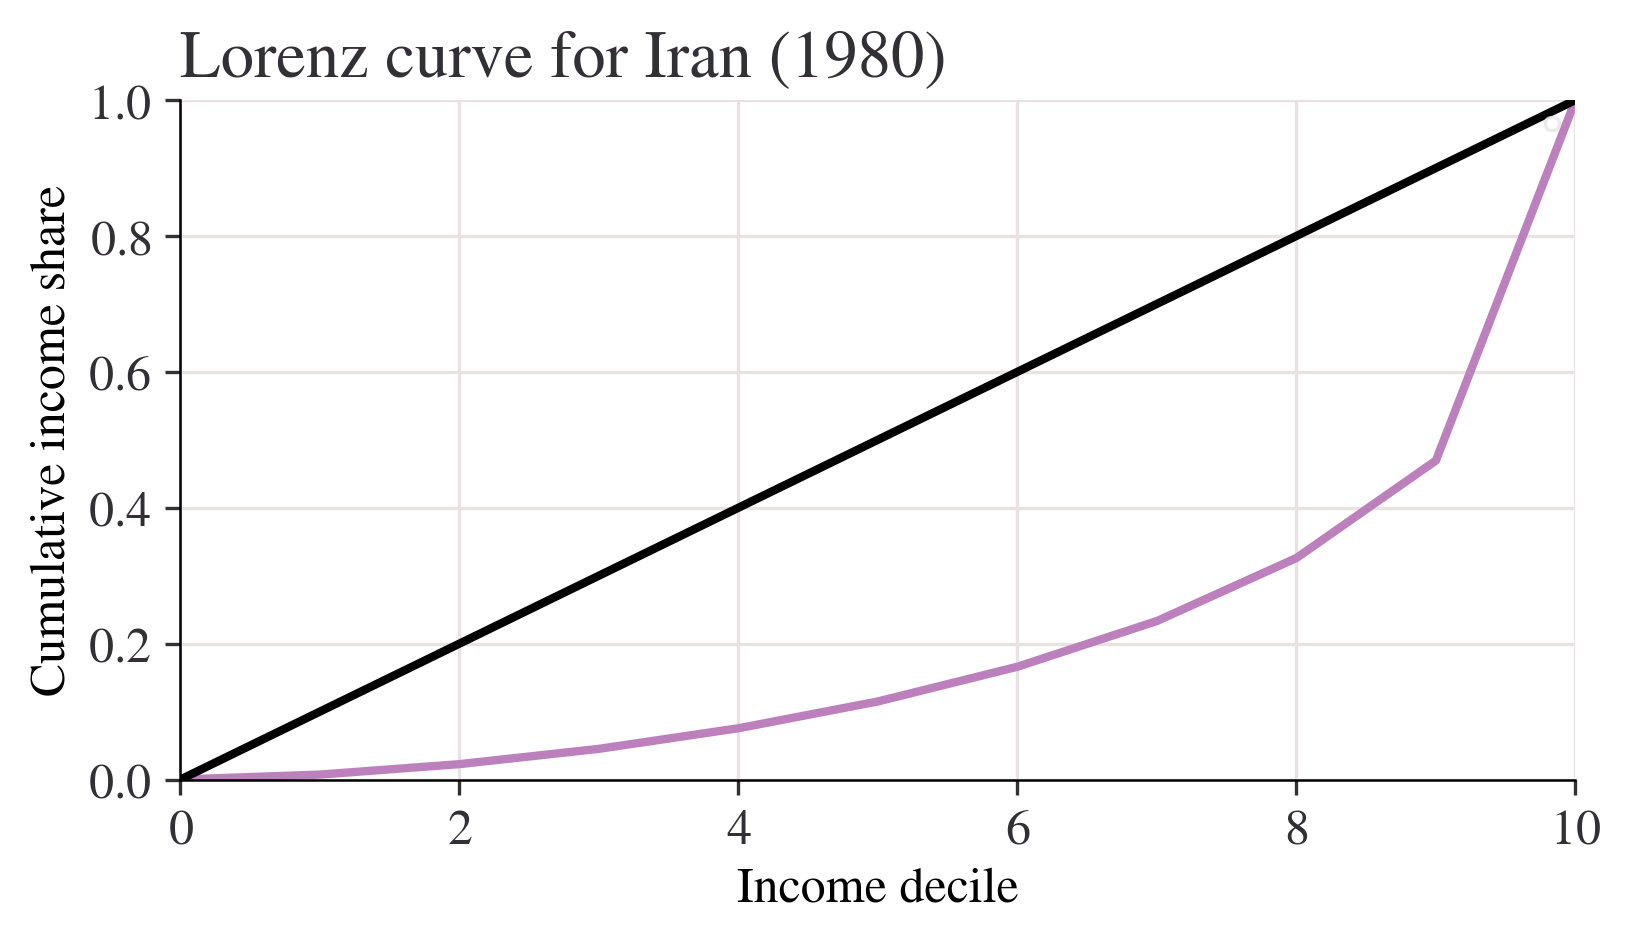

In [8]:
# Add a zero value at the beginning of each DataFrame (if it's a single-row DF)
for df in [cum_income_share_ir14, cum_income_share_tr80, cum_income_share_tr14, cum_income_share_ir80]:
    df.insert(0, 0, 0)

fig, ax = plt.subplots()

# Plot the Lorenz curve
cum_income_share_ir80.T.plot(ax=ax)

# Add the line of equality (45-degree line)
x_vals = list(range(len(cum_income_share_ir80.columns)))
ax.plot(x_vals, [x / (len(x_vals)-1) for x in x_vals], color="k")

ax.set_ylim(0, 1)
ax.set_xlim(0, len(x_vals) - 1)
ax.legend([])
ax.set_title("Lorenz curve for Iran (1980)")
ax.set_xlabel("Income decile")
ax.set_ylabel("Cumulative income share")
plt.show()


The purple line is the Lorenz curve, which shows the cumulative share of income held by each decile. The black line is the line of perfect equality, where each decile holds an equal share of total income. The further the Lorenz curve is from the line of perfect equality, the greater the inequality in income distribution.

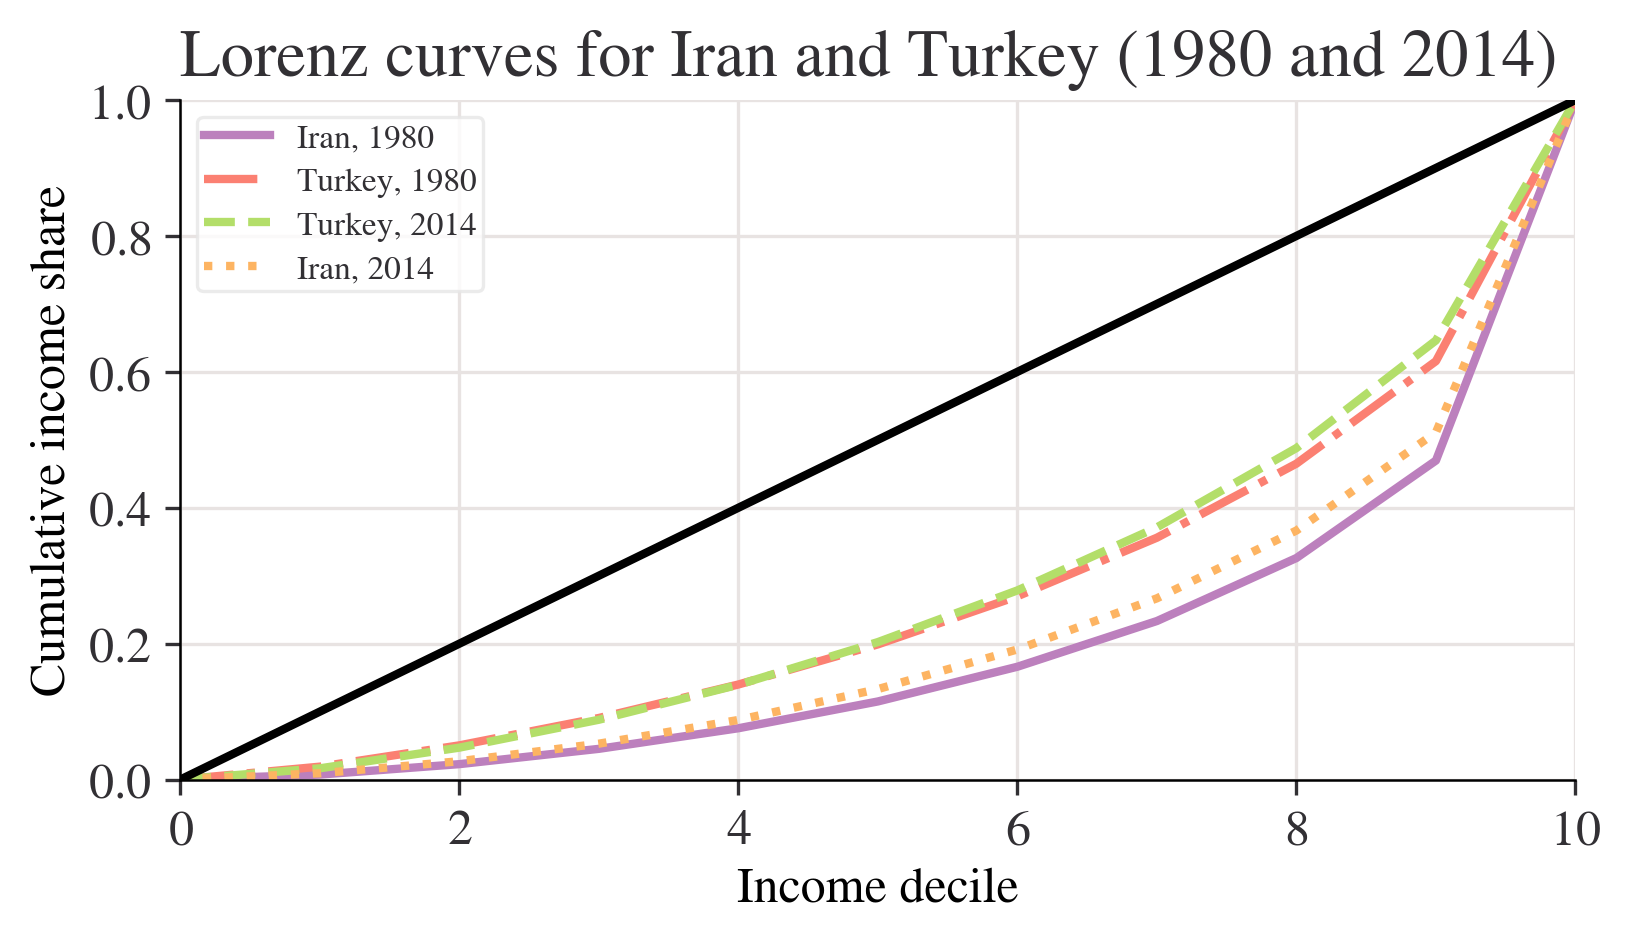

In [9]:
fig, ax = plt.subplots()

for line, style in zip(
    [cum_income_share_ir80, cum_income_share_tr80, cum_income_share_tr14, cum_income_share_ir14],
    ["-", "-.", "--", ":"],
):
    line.T.plot(ax=ax, style=style)

# 45-degree equality line
x_vals = list(range(len(cum_income_share_ir80.columns)))
ax.plot(x_vals, [x / (len(x_vals) - 1) for x in x_vals], color="k")

ax.set_ylim(0, 1)
ax.set_xlim(0, len(x_vals) - 1)
ax.set_title("Lorenz curves for Iran and Turkey (1980 and 2014)")
ax.set_xlabel("Income decile")
ax.set_ylabel("Cumulative income share")
plt.show()
